## Compare results

In [1]:
# import subprocess
import pandas as pd
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
# import metrics

## dense point cloud

In [2]:

vpcc_csvs = sorted(['results/VPCC/redandblack_vox10_1550.csv',
                   'results/VPCC/longdress_vox10_1300.csv', 
                   'results/VPCC/loot_vox10_1200.csv', 
                   'results/VPCC/soldier_vox10_0690.csv', 
                   'results/VPCC/queen_0200.csv', 
                   'results/VPCC/ricardo_vox10_frame0082.csv'])

gpcc_octree_csvs = sorted(['results/GPCC/octree/redandblack_vox10_1550.csv', 
                           'results/GPCC/octree/longdress_vox10_1300.csv', 
                           'results/GPCC/octree/loot_vox10_1200.csv', 
                           'results/GPCC/octree/soldier_vox10_0690.csv', 
                           'results/GPCC/octree/queen_0200.csv', 
                           'results/GPCC/octree/ricardo_vox10_frame0082.csv'])

gpcc_trisoup_csvs = sorted(['results/GPCC/trisoup/redandblack_vox10_1550.csv', 
                           'results/GPCC/trisoup/longdress_vox10_1300.csv', 
                           'results/GPCC/trisoup/loot_vox10_1200.csv', 
                           'results/GPCC/trisoup/soldier_vox10_0690.csv', 
                           'results/GPCC/trisoup/queen_0200.csv', 
                           'results/GPCC/trisoup/ricardo_vox10_frame0082.csv'])

pcl_csvs = sorted(['results/PCL/redandblack_vox10_1550.ply.csv', 
                   'results/PCL/longdress_vox10_1300.ply.csv', 
                   'results/PCL/loot_vox10_1200.ply.csv', 
                   'results/PCL/soldier_vox10_0690.ply.csv', 
                   'results/PCL/queen_0200.ply.csv', 
                   'results/PCL/ricardo_vox10_frame0082.ply.csv'])

learnedpcgc_csvs = sorted(['CSV/hyper/redandblack_vox10_1550.csv',
                           'CSV/hyper/longdress_vox10_1300.csv', 
                           'CSV/hyper/loot_vox10_1200.csv', 
                           'CSV/hyper/soldier_vox10_0690.csv', 
                          'CSV/hyper/queen_0200.csv', 
                          'CSV/hyper/ricardo_vox10_frame0082.csv'])

learnedpcgc_csvs_f = sorted(['CSV/factorized/redandblack_vox10_1550.csv',
                           'CSV/factorized/longdress_vox10_1300.csv', 
                           'CSV/factorized/loot_vox10_1200.csv', 
                           'CSV/factorized/soldier_vox10_0690.csv', 
                          'CSV/factorized/queen_0200.csv', 
                          'CSV/factorized/ricardo_vox10_frame0082.csv'])

In [3]:

# vpcc_csvs = sorted(['results/VPCC/andrew_vox9_frame0000.csv',
#                    'results/VPCC/david_vox9_frame0000.csv', 
#                    'results/VPCC/phil_vox9_frame0139.csv', 
#                    'results/VPCC/sarah_vox9_frame0023.csv'])

# gpcc_octree_csvs = sorted(['results/GPCC/octree/andrew_vox9_frame0000.csv', 
#                            'results/GPCC/octree/david_vox9_frame0000.csv', 
#                            'results/GPCC/octree/phil_vox9_frame0139.csv', 
#                            'results/GPCC/octree/sarah_vox9_frame0023.csv'])

# gpcc_trisoup_csvs = sorted(['results/GPCC/trisoup/andrew_vox9_frame0000.csv', 
#                            'results/GPCC/trisoup/david_vox9_frame0000.csv', 
#                            'results/GPCC/trisoup/phil_vox9_frame0139.csv', 
#                            'results/GPCC/trisoup/sarah_vox9_frame0023.csv'])

# pcl_csvs = sorted(['results/PCL/andrew_vox9_frame0000.ply.csv', 
#                    'results/PCL/david_vox9_frame0000.ply.csv', 
#                    'results/PCL/phil_vox9_frame0139.ply.csv', 
#                    'results/PCL/sarah_vox9_frame0023.ply.csv'])

# learnedpcgc_csvs = sorted(['CSV/hyper/andrew_vox9_frame0000.csv',
#                            'CSV/hyper/david_vox9_frame0000.csv', 
#                            'CSV/hyper/phil_vox9_frame0139.csv', 
#                            'CSV/hyper/sarah_vox9_frame0023.csv'])

# learnedpcgc_csvs_f = sorted(['CSV/factorized/andrew_vox9_frame0000.csv',
#                            'CSV/factorized/david_vox9_frame0000.csv', 
#                            'CSV/factorized/phil_vox9_frame0139.csv', 
#                            'CSV/factorized/sarah_vox9_frame0023.csv'])

In [4]:
# vpcc_csvs = sorted(['results/VPCC/basketball_player_vox11_00000200.csv',
#                    'results/VPCC/dancer_vox11_00000001.csv', 
#                    'results/VPCC/exercise_vox11_00000001.csv', 
#                    'results/VPCC/model_vox11_00000001.csv'])

# gpcc_octree_csvs = sorted(['results/GPCC/octree/basketball_player_vox11_00000200.csv', 
#                            'results/GPCC/octree/dancer_vox11_00000001.csv', 
#                            'results/GPCC/octree/exercise_vox11_00000001.csv', 
#                            'results/GPCC/octree/model_vox11_00000001.csv'])

# gpcc_trisoup_csvs = sorted(['results/GPCC/trisoup/basketball_player_vox11_00000200.csv', 
#                            'results/GPCC/trisoup/dancer_vox11_00000001.csv', 
#                            'results/GPCC/trisoup/exercise_vox11_00000001.csv', 
#                            'results/GPCC/trisoup/model_vox11_00000001.csv'])

# pcl_csvs = sorted(['results/PCL/basketball_player_vox11_00000200.ply.csv', 
#                    'results/PCL/dancer_vox11_00000001.ply.csv', 
#                    'results/PCL/exercise_vox11_00000001.ply.csv', 
#                    'results/PCL/model_vox11_00000001.ply.csv'])

# learnedpcgc_csvs = sorted(['CSV/hyper/basketball_player_vox11_00000200.csv',
#                            'CSV/hyper/dancer_vox11_00000001.csv', 
#                            'CSV/hyper/exercise_vox11_00000001.csv', 
#                            'CSV/hyper/model_vox11_00000001.csv'])

# learnedpcgc_csvs_f = sorted(['CSV/factorized/basketball_player_vox11_00000200.csv',
#                            'CSV/factorized/dancer_vox11_00000001.csv', 
#                            'CSV/factorized/exercise_vox11_00000001.csv', 
#                            'CSV/factorized/model_vox11_00000001.csv'])

## sparse

In [5]:
# vpcc_csvs = sorted(['results/VPCC/Facade_00009_vox12.csv', 
#                    'results/VPCC/House_without_roof_00057_vox12.csv', 
#                    'results/VPCC/Shiva_00035_vox12.csv', 
#                    'results/VPCC/Staue_Klimt_vox12.csv'])

# gpcc_octree_csvs = sorted(['results/GPCC/octree/Facade_00009_vox12.csv', 
#                           'results/GPCC/octree/House_without_roof_00057_vox12.csv', 
#                           'results/GPCC/octree/Shiva_00035_vox12.csv', 
#                           'results/GPCC/octree/Staue_Klimt_vox12.csv'])

# gpcc_trisoup_csvs = sorted(['results/GPCC/trisoup/Facade_00009_vox12.csv', 
#                            'results/GPCC/trisoup/House_without_roof_00057_vox12.csv', 
#                            'results/GPCC/trisoup/Shiva_00035_vox12.csv', 
#                            'results/GPCC/trisoup/Staue_Klimt_vox12.csv'])

# pcl_csvs = sorted(['results/PCL/Facade_00009_vox12.ply.csv', 
#                   'results/PCL/House_without_roof_00057_vox12.ply.csv', 
#                   'results/PCL/Shiva_00035_vox12.ply.csv', 
#                   'results/PCL/Staue_Klimt_vox12.ply.csv'])

# learnedpcgc_csvs = sorted(['CSV/hyper/Facade_00009_vox12.csv', 
#                           'CSV/hyper/House_without_roof_00057_vox12.csv', 
#                           'CSV/hyper/Shiva_00035_vox12.csv', 
#                           'CSV/hyper/Staue_Klimt_vox12.csv'])

In [6]:
idx = 0

In [7]:
postfix = '_d1'
metric = 'mseF,PSNR (p2point)'
ylabel = "D1 PSNR (dB)"

# postfix = '_d2'
# metric = 'mseF,PSNR (p2plane)'
# ylabel = "D2 PSNR (dB)"

In [8]:
vpcc_csv = vpcc_csvs[idx]
print(vpcc_csv)
vpcc = pd.read_csv(vpcc_csv)

gpcc_octree_csv = gpcc_octree_csvs[idx]
print(gpcc_octree_csv)
gpcc_octree = pd.read_csv(gpcc_octree_csv)

# gpcc_octree = gpcc_octree[1:-1]

gpcc_trisoup_csv = gpcc_trisoup_csvs[idx]
print(gpcc_trisoup_csv)
gpcc_trisoup = pd.read_csv(gpcc_trisoup_csv)

pcl_csv = pcl_csvs[idx]
print(pcl_csv)
pcl = pd.read_csv(pcl_csv)

learnedpcgc_csv = learnedpcgc_csvs[idx]
learnedpcgc_csv = learnedpcgc_csv[:-4]+postfix+'.csv'
print(learnedpcgc_csv)
learnedpcgc = pd.read_csv(learnedpcgc_csv)
# learnedpcgc = learnedpcgc[-5:]


# learnedpcgc_csv_f = learnedpcgc_csvs_f[idx]
# learnedpcgc_csv_f = learnedpcgc_csv_f[:-4]+postfix+'.csv'
# print(learnedpcgc_csv_f)
# learnedpcgc_f = pd.read_csv(learnedpcgc_csv_f)
# learnedpcgc_f = learnedpcgc_f[:-1]

results/VPCC/longdress_vox10_1300.csv
results/GPCC/octree/longdress_vox10_1300.csv
results/GPCC/trisoup/longdress_vox10_1300.csv
results/PCL/longdress_vox10_1300.ply.csv
CSV/hyper/longdress_vox10_1300_d1.csv


In [9]:
learnedpcgc

,mse1 (p2point),"mse1,PSNR (p2point)",mse1 (p2plane),"mse1,PSNR (p2plane)",h. 1(p2point),"h.,PSNR 1(p2point)",h. 1(p2plane),"h.,PSNR 1(p2plane)",mse2 (p2point),"mse2,PSNR (p2point)",...,n_points,rho,ori_points,scale,bpp_strings,bpp_strings_head,bpp_strings_hyper,bpp_pointsnums,bpp_cubepos,bpp
0,1.236110,64.0482,0.408236,68.8596,98.3601,45.0405,41.13840,48.8262,1.289060,63.8660,...,417265,1.15,857966,0.625,0.0293,0.0016,0.0162,0.0015,0.0006,0.0492
1,0.404764,68.8967,0.152974,73.1226,82.0000,45.8306,24.65710,51.0493,0.442723,68.5074,...,985939,1.15,857966,1.000,0.0665,0.0038,0.0383,0.0038,0.0008,0.1132
2,0.237072,71.2199,0.094305,75.2234,104.0000,44.7984,15.03940,53.1964,0.250677,70.9776,...,900175,1.05,857966,1.000,0.1188,0.0038,0.0448,0.0038,0.0008,0.1721
3,0.189762,72.1866,0.073985,76.2773,53.0000,47.7260,9.00000,55.4263,0.175456,72.5270,...,857398,1.00,857966,1.000,0.1646,0.0038,0.0512,0.0038,0.0008,0.2242
4,0.144764,73.3621,0.054475,77.6067,27.0000,50.6551,5.59411,57.4914,0.138448,73.5559,...,857398,1.00,857966,1.000,0.2188,0.0039,0.0665,0.0038,0.0008,0.2938
5,0.113137,74.4327,0.041125,78.8277,14.0000,53.5074,6.65699,56.7360,0.110351,74.5409,...,857398,1.00,857966,1.000,0.2703,0.0042,0.0875,0.0038,0.0008,0.3666
6,0.097090,75.0970,0.033491,79.7194,33.0000,49.7836,11.85730,54.2289,0.092784,75.2940,...,857398,1.00,857966,1.000,0.3393,0.0046,0.1194,0.0038,0.0008,0.4680


In [10]:
gpcc_octree

,Unnamed: 0,mse1 (p2point),"mse1,PSNR (p2point)",mse1 (p2plane),"mse1,PSNR (p2plane)",h. 1(p2point),"h.,PSNR 1(p2point)",h. 1(p2plane),"h.,PSNR 1(p2plane)",mse2 (p2point),...,mseF (p2plane),"mseF,PSNR (p2plane)",h. (p2point),"h.,PSNR (p2point)",h. (p2plane),"h.,PSNR (p2plane)",rate,bpp,n_points_ori,n_points_out
0,0,16.532000,52.7855,5.077840,57.9119,48.000000,48.1563,26.848800,50.6795,9.293780,...,8.597910,55.6248,48.000000,48.1563,47.967600,48.1592,1,0.024467,857966.0,15685.0
1,1,4.496230,58.4402,1.358170,63.6392,12.000000,54.1769,5.681970,57.4237,2.253000,...,1.870200,62.2499,12.000000,54.1769,11.989800,54.1806,2,0.084479,857966.0,62123.0
2,2,1.498500,63.2122,0.433122,68.6026,3.000000,60.1975,2.082820,61.7822,0.682014,...,0.448875,68.4475,3.000000,60.1975,2.999520,60.1982,3,0.285065,857966.0,238492.0
3,3,0.499581,67.9827,0.154105,73.0906,1.333370,63.7192,0.997048,64.9816,0.337174,...,0.154105,73.0906,1.333370,63.7192,1.332240,63.7229,4,0.645592,857966.0,509139.0
4,4,0.337384,69.6875,0.109860,74.5603,0.979637,65.0581,0.815267,65.8557,0.282727,...,0.109860,74.5603,0.979637,65.0581,0.978910,65.0613,5,0.837059,857966.0,674930.0
5,5,0.287992,70.3749,0.096994,75.1013,0.853315,65.6576,0.716352,66.4175,0.265465,...,0.096994,75.1013,0.853315,65.6576,0.852739,65.6606,6,0.931300,857966.0,764041.0


In [11]:
pcl

,Unnamed: 0,mse1 (p2point),"mse1,PSNR (p2point)",mse1 (p2plane),"mse1,PSNR (p2plane)",h. 1(p2point),"h.,PSNR 1(p2point)",h. 1(p2plane),"h.,PSNR 1(p2plane)",mse2 (p2point),...,mseF (p2plane),"mseF,PSNR (p2plane)",h. (p2point),"h.,PSNR (p2point)",h. (p2plane),"h.,PSNR (p2plane)",octreeResolution,bpp,n_points_out,n_points_ori
0,0,0.379000,69.1823,0.120508,74.1586,1.08002,64.6344,0.845104,65.6996,0.296103,...,0.120508,74.1586,1.08002,64.6344,1.07933,64.6372,1.2,1.644652,617826.0,857966.0
1,1,0.686201,66.6042,0.205348,71.8438,1.68750,62.6963,1.185790,64.2286,0.399996,...,0.205348,71.8438,1.68750,62.6963,1.68685,62.6980,1.5,1.045122,409688.0,857966.0
2,2,1.687320,62.6968,0.512322,67.8733,4.68750,58.2593,2.620420,60.7850,0.876024,...,0.592633,67.2409,4.68750,58.2593,4.68647,58.2603,2.5,0.389359,154983.0,857966.0
3,3,3.187350,59.9344,0.992413,65.0018,9.18750,55.3368,5.339860,57.6934,1.663310,...,1.292250,63.8553,9.18750,55.3368,9.17970,55.3404,3.5,0.203561,80747.0,857966.0
4,4,5.198150,57.8102,1.639750,62.8209,15.18750,53.1539,9.182390,55.3392,2.784560,...,2.336390,61.2833,15.18750,53.1539,15.03140,53.1987,4.5,0.126700,49395.0,857966.0
5,5,6.736810,56.6842,2.054410,61.8419,18.75000,52.2387,12.421800,54.0269,3.779840,...,3.114020,60.0355,18.75000,52.2387,18.74590,52.2397,5.0,0.103678,40014.0,857966.0
6,6,9.474950,55.2030,2.900120,60.3446,27.00000,50.6551,13.158000,53.7768,5.079740,...,4.541080,58.3971,27.00000,50.6551,26.98380,50.6577,6.0,0.074716,27765.0,857966.0


In [12]:
vpcc

,Unnamed: 0,mse1 (p2point),"mse1,PSNR (p2point)",mse1 (p2plane),"mse1,PSNR (p2plane)",h. 1(p2point),"h.,PSNR 1(p2point)",h. 1(p2plane),"h.,PSNR 1(p2plane)",mse2 (p2point),...,"h.,PSNR (p2plane)",n_points_ori,n_points_out,auxiliary Bytes,occupancy Bytes,geometry Bytes,texture Bytes,total Bytes,geometry bpp,bpp
0,0,0.750050,66.2178,0.424771,68.6872,83.0,45.7779,33.00260,49.7832,0.698241,...,43.9217,857966.0,786404.0,578,2384,3951,13980,20893,0.064459,0.194814
1,1,0.482433,68.1344,0.246083,71.0579,44.0,48.5342,17.78490,52.4682,0.480758,...,42.5335,857966.0,844331.0,578,2384,5587,27384,35933,0.079714,0.335053
2,2,0.362316,69.3778,0.166799,72.7468,38.0,49.1709,12.06790,54.1524,0.352451,...,44.9601,857966.0,847585.0,578,2384,7973,52205,63140,0.101962,0.588741
3,3,0.272110,70.6213,0.112010,74.4762,14.0,53.5074,7.85643,56.0165,0.275835,...,45.0458,857966.0,869132.0,578,2384,11846,101991,116799,0.138075,1.089078
4,4,0.235859,71.2422,0.089210,75.4646,13.0,53.8293,8.52524,55.6617,0.199591,...,46.1659,857966.0,834446.0,578,4983,18128,183585,207274,0.220885,1.932701


In [13]:
gpcc_trisoup

,Unnamed: 0,mse1 (p2point),"mse1,PSNR (p2point)",mse1 (p2plane),"mse1,PSNR (p2plane)",h. 1(p2point),"h.,PSNR 1(p2point)",h. 1(p2plane),"h.,PSNR 1(p2plane)",mse2 (p2point),...,mseF (p2plane),"mseF,PSNR (p2plane)",h. (p2point),"h.,PSNR (p2point)",h. (p2plane),"h.,PSNR (p2plane)",rate,bpp,n_points_ori,n_points_out
0,0,3.273510,59.8186,1.763450,62.5051,581.0,37.3270,191.62900,42.1441,2.348760,...,2.046520,61.8586,581.0,37.3270,191.62900,42.1441,1,0.052562,857966.0,607613.0
1,1,0.789544,65.9950,0.430370,68.6303,37.0,49.2867,20.15180,51.9256,0.585377,...,0.430370,68.6303,37.0,49.2867,30.81350,50.0813,2,0.188837,857966.0,642798.0
2,2,0.508708,67.9040,0.269002,70.6712,13.0,53.8293,8.32732,55.7637,0.385801,...,0.269002,70.6712,13.0,53.8293,8.32732,55.7637,5,0.710947,857966.0,719478.0


In [14]:
prefix = os.path.split(learnedpcgc_csv)[-1].split('.')[0].split('_')[0]
print(prefix)

longdress


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


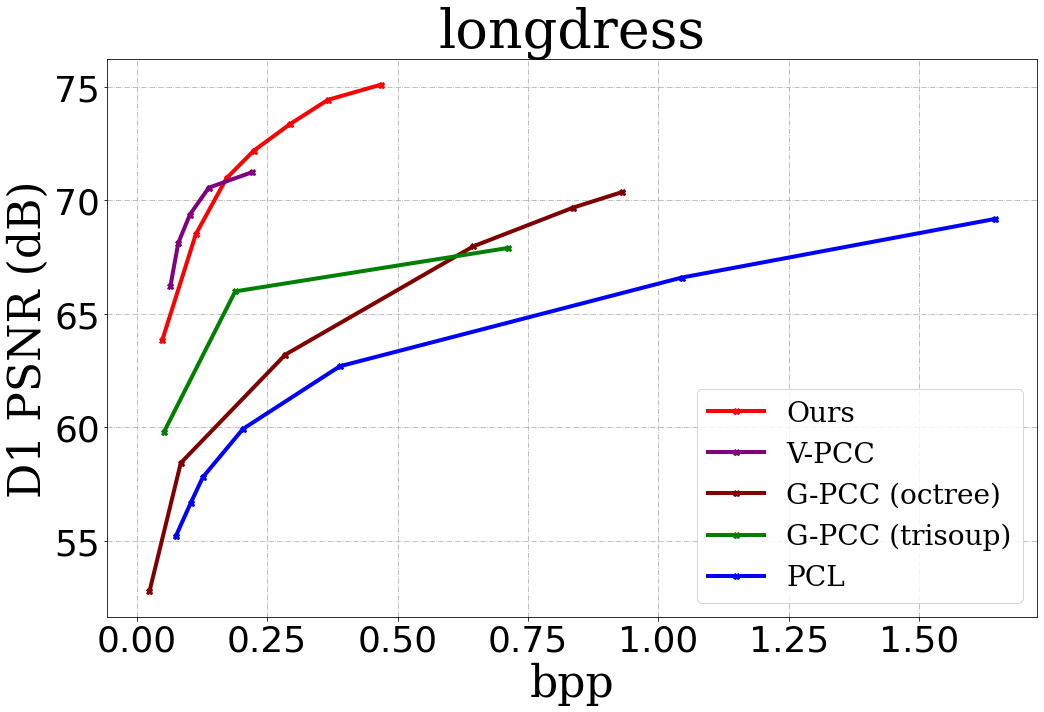

In [15]:
fig, ax = plt.subplots(figsize=(7.3*2,5*2))


A= plt.plot(learnedpcgc['bpp'], learnedpcgc[metric], 
            label = "Ours",color ="red",linewidth=4, marker='X')

# A= plt.plot(learnedpcgc_f['bpp'], learnedpcgc_f[metric], 
#             label = "Ours (factorized)",color ="orange",linewidth=4, marker='X')

B= plt.plot(vpcc['geometry bpp'], vpcc[metric], 
            label = "V-PCC",color ="purple",linewidth=4, marker='X',)

C= plt.plot(gpcc_octree['bpp'], gpcc_octree[metric], 
            label = "G-PCC (octree)",color ="#800000",linewidth=4, marker='X',)

D= plt.plot(gpcc_trisoup['bpp'], gpcc_trisoup[metric], 
            label = "G-PCC (trisoup)",color ="green",linewidth=4, marker='X',)

E= plt.plot(pcl['bpp'], pcl[metric], 
            label = "PCL",color ="blue",linewidth=4, marker='X',)

#                             'style':'italic',
font_label = {'family' : 'serif',
'weight' : 'normal',

'size'   : 44}

font_title = {'family' : 'serif',
'weight' : 'normal',
'size'   : 54}

font_legend = {'family' : 'serif',
'weight' : 'normal',
'size'   : 28}

# ax.set_xlim([0, 2.0])
# ax.set_ylim([60, 75])
ax.locator_params(axis='x', nbins=8)

plt.tick_params(labelsize=36)
plt.xlabel("bpp",font_label)
plt.ylabel(ylabel,font_label)
plt.title(prefix, font_title)
plt.grid(ls='-.')
plt.legend(prop = font_legend, loc='lower right')

fig.tight_layout()
fig.savefig('./results/' + prefix + ylabel.split(' ')[0] + '.eps')
fig.savefig('./results/'+ prefix + ylabel.split(' ')[0] + '.png')

## BD-Rate

In [16]:
from myutils import bdrate_metrics

In [17]:
def points_for_bdrate(df, index_rate='bpp', index_psnr='mseF,PSNR (p2point)'):
    rate = df[index_rate]
    psnr = df[index_psnr]
    rd_points = [tuple((a, b)) for a, b in zip(rate, psnr)]
    return rd_points

In [18]:
rd_points_learnedpcgc = points_for_bdrate(learnedpcgc, 'bpp', metric)
# rd_points_learnedpcgc_f = points_for_bdrate(learnedpcgc_f, 'bpp', metric)

rd_points_gpcc_octree = points_for_bdrate(gpcc_octree, 'bpp', metric)
rd_points_gpcc_trisoup = points_for_bdrate(gpcc_trisoup, 'bpp', metric)
rd_points_vpcc = points_for_bdrate(vpcc, 'geometry bpp', metric)
rd_points_pcl = points_for_bdrate(pcl, 'bpp', metric)

In [19]:
#### vpcc
# bdrate_hyper = bdrate_metrics.bdrate(rd_points_learnedpcgc_f, rd_points_learnedpcgc)
# print('prior', bdrate_hyper)

bdrate = bdrate_metrics.bdrate(rd_points_vpcc, rd_points_learnedpcgc)
print('vpcc', bdrate)

#### gpcc octree

bdrate_gpcc_octree = bdrate_metrics.bdrate(rd_points_gpcc_octree, rd_points_learnedpcgc)
print('octree', bdrate_gpcc_octree)

#### pcl

bdrate_gpcc_pcl = bdrate_metrics.bdrate(rd_points_pcl, rd_points_learnedpcgc)
print('pcl', bdrate_gpcc_pcl)

#### gpcc trisoup

bdrate_gpcc_trisoup = bdrate_metrics.bdrate(rd_points_gpcc_trisoup, rd_points_learnedpcgc)
print('trisoup', bdrate_gpcc_trisoup)


vpcc 22.265456671628712
octree -84.398995849981
pcl -91.76846222318913
trisoup -62.69438149240037


/home/ubuntu/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:20: RankWarning: Polyfit may be poorly conditioned
